In [2]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# read in mood data
mood_data = pd.read_csv("../ProjectMainCodeFiles/mood_data_main.csv")
mood_data

,title,artist,primary,secondary
0,i hope she loves me back,boy pablo,2,3
1,Pray Slow,Chase Shakur,6,4
2,All Your Love,Jakob Ogawa,1,3
3,Looking Out For You,Joy Again,4,2
4,Feel Like A Fool,Kali Uchis,1,6
5,i want war (BUT I NEED PEACE),Kali Uchis,5,6
6,Telepatía,Kali Uchis,1,5
7,Parking Lots,Plums,5,2
8,Annie Chases a Butterfly,Silk Skin Lovers,3,4
9,F Song,Strawberry Guy,4,2


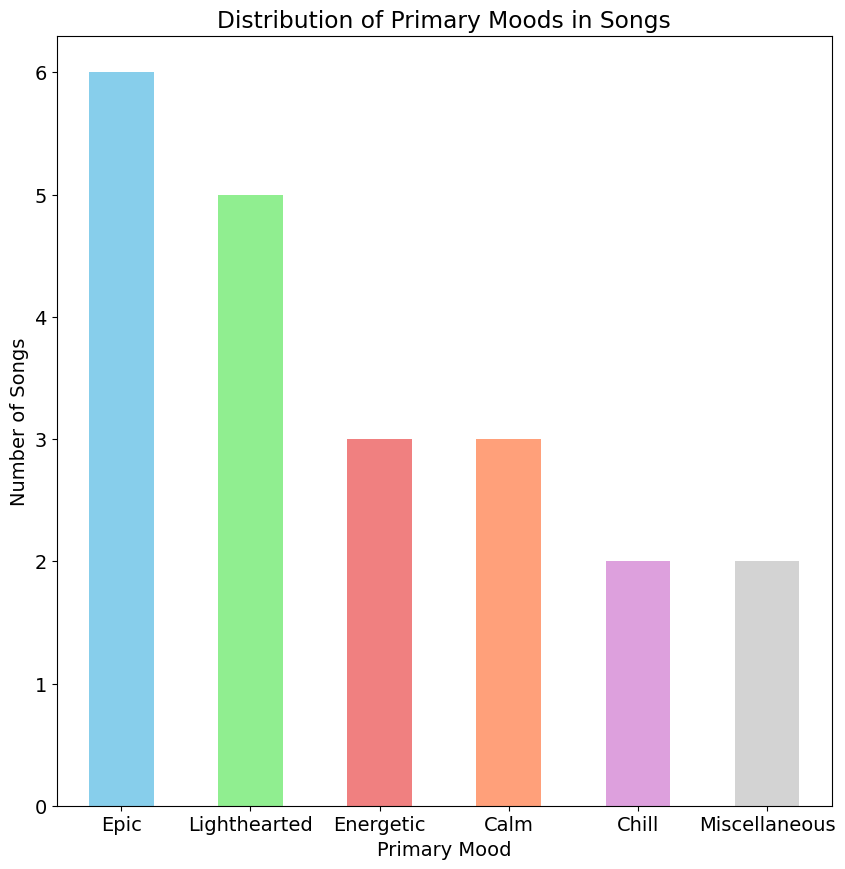

In [22]:
# Creating a bar chart to visualize primary mood distribution
primary_moods_count = mood_data['primary'].value_counts()
plt.rc('font', size=14)

fig, ax = plt.subplots(figsize=(10, 10))
colors = ["skyblue", "lightgreen", "lightcoral", "lightsalmon", "plum", "lightgray"]

primary_moods_count.plot(kind='bar', color=colors, rot=0)

ax.set_ylabel('Number of Songs')
ax.set_xlabel('Primary Mood')
ax.set_title('Distribution of Primary Moods in Songs')
ax.set_xticklabels(('Epic', 'Lighthearted', 'Energetic', 'Calm', 'Chill', 'Miscellaneous'))

plt.savefig("primary_mood_bar_chart.pdf")

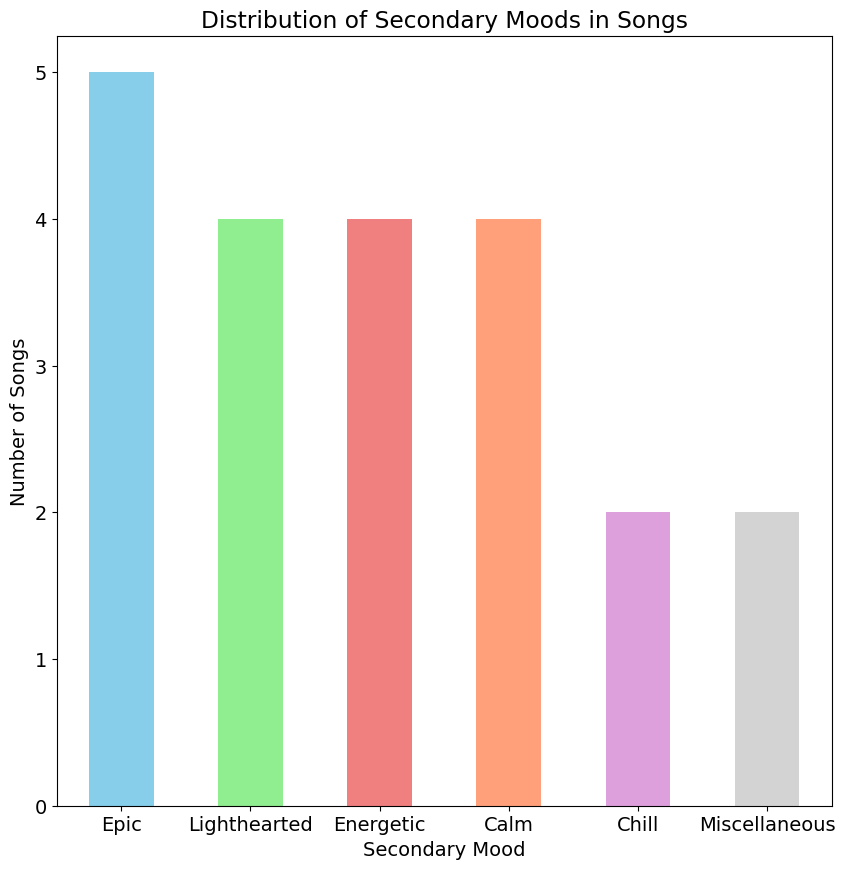

In [23]:
# Creating a bar chart to visualize secondary mood distribution
secondary_moods_count = mood_data['secondary'].value_counts()
plt.rc('font', size=14)

fig, ax = plt.subplots(figsize=(10, 10))
colors = ["skyblue", "lightgreen", "lightcoral", "lightsalmon", "plum", "lightgray"]

secondary_moods_count.plot(kind='bar', color=colors, rot=0)

ax.set_ylabel('Number of Songs')
ax.set_xlabel('Secondary Mood')
ax.set_title('Distribution of Secondary Moods in Songs')
ax.set_xticklabels(('Epic', 'Lighthearted', 'Energetic', 'Calm', 'Chill', 'Miscellaneous'))

plt.savefig("secondary_mood_bar_chart.pdf")

In [24]:
# list top 10 artists
artist_groups = mood_data.groupby('artist')
plt.rc('font', size=14)
top10 = artist_groups.size().sort_values(ascending = False).head(10)
top10

artist
TV Girl             7
Kali Uchis          3
Vacations           2
Chase Shakur        1
Jakob Ogawa         1
Joy Again           1
Plums               1
Silk Skin Lovers    1
Strawberry Guy      1
VACATIONS           1
dtype: int64

In [25]:
# Create a correlation DataFrame for basic features
features = pd.read_csv("../data/features.csv")
columns_to_exclude = ['title', 'artist', 'primary', 'secondary']
features_corr = features.drop(columns=columns_to_exclude)

# Calculate the correlation matrix
corr_matrix = features_corr.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

#corr_matrix.to_csv("correlation_matrix_basic_features.csv", index=False)


Correlation Matrix:
                       tempo  chroma_number  zero_crossing_rate  \
tempo               1.000000       0.248661            0.261987   
chroma_number       0.248661       1.000000            0.092395   
zero_crossing_rate  0.261987       0.092395            1.000000   
energy_entropy      0.734836       0.378480            0.179836   
spectral_centroid  -0.080305      -0.137256            0.827344   

                    energy_entropy  spectral_centroid  
tempo                     0.734836          -0.080305  
chroma_number             0.378480          -0.137256  
zero_crossing_rate        0.179836           0.827344  
energy_entropy            1.000000          -0.069121  
spectral_centroid        -0.069121           1.000000  


<Figure size 800x600 with 0 Axes>

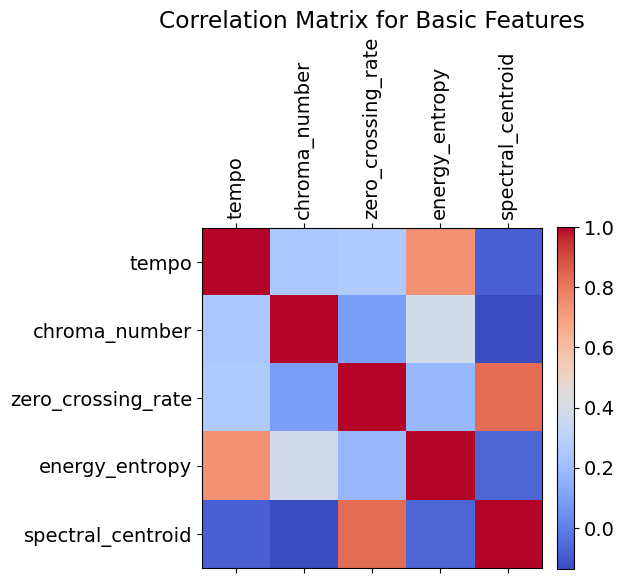

In [27]:
# Plot the correlation matrix for basic features using a heatmap
corr = features_corr.corr()

plt.figure(figsize=(8, 6))
heatmap = plt.matshow(corr, cmap='coolwarm')

plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar(heatmap, fraction=0.046, pad=0.04)

plt.title('Correlation Matrix for Basic Features')
plt.savefig("correlation_matrix_heatmap.pdf", bbox_inches='tight')
plt.show()


In [14]:
# Create a correlation DataFrame for engineered features
eng_features = pd.read_csv("../data/engineered_features.csv")
columns_to_exclude = ['title', 'artist', 'primary', 'secondary']
eng_features_corr = features.drop(columns=columns_to_exclude)

# Calculate the correlation matrix
eng_features_corr = features_corr.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(eng_features_corr)


Correlation Matrix:
                       tempo  chroma_number  zero_crossing_rate  \
tempo               1.000000       0.248661            0.261987   
chroma_number       0.248661       1.000000            0.092395   
zero_crossing_rate  0.261987       0.092395            1.000000   
energy_entropy      0.734836       0.378480            0.179836   
spectral_centroid  -0.080305      -0.137256            0.827344   

                    energy_entropy  spectral_centroid  
tempo                     0.734836          -0.080305  
chroma_number             0.378480          -0.137256  
zero_crossing_rate        0.179836           0.827344  
energy_entropy            1.000000          -0.069121  
spectral_centroid        -0.069121           1.000000  


<Figure size 800x600 with 0 Axes>

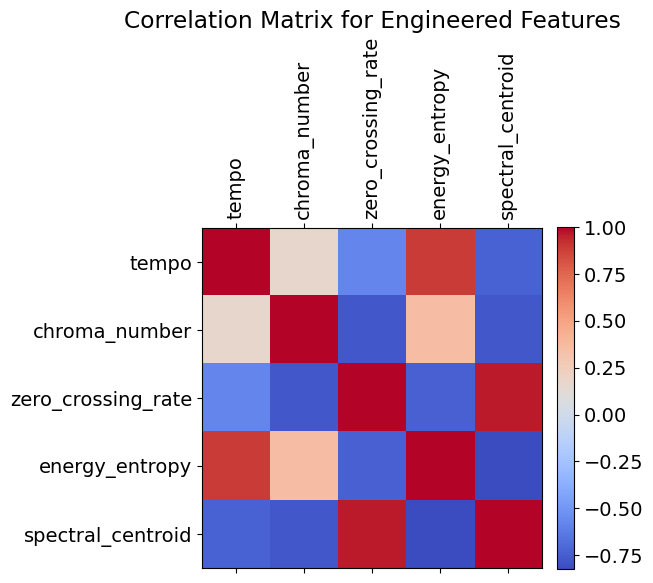

In [28]:
# Plot the correlation matrix for engineered features using a heatmap
corr = eng_features_corr.corr()

plt.figure(figsize=(8, 6))
heatmap = plt.matshow(corr, cmap='coolwarm')

plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar(heatmap, fraction=0.046, pad=0.04)

plt.title('Correlation Matrix for Engineered Features')
plt.savefig("eng_correlation_matrix.pdf", bbox_inches='tight')
plt.show()


In [29]:
features = pd.read_csv("../data/features.csv")
nn_features = pd.read_csv("../data/nn_features.csv")

In [30]:
# combine neural network features with basic features to add mood labels
combined = pd.concat([features, nn_features], axis = 1)
combined['song_check'] = combined['artist'] + ' - ' + combined['title']
if combined['song'].equals(combined['song_check']):
    print ("Features match.")
    combined = combined.drop(columns = ['song', 'song_check'])
else:
    print ("Features DO NOT match.")

Features match.


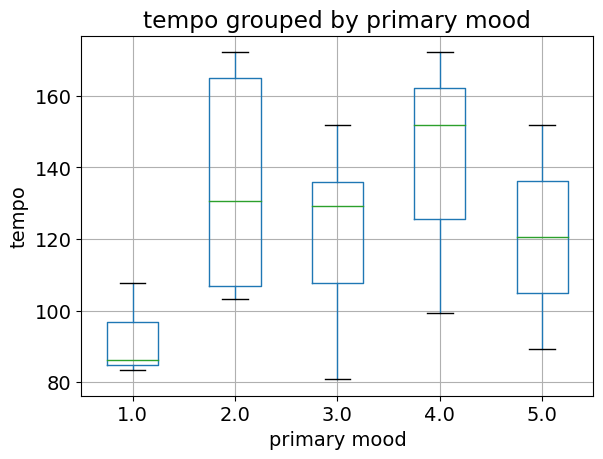

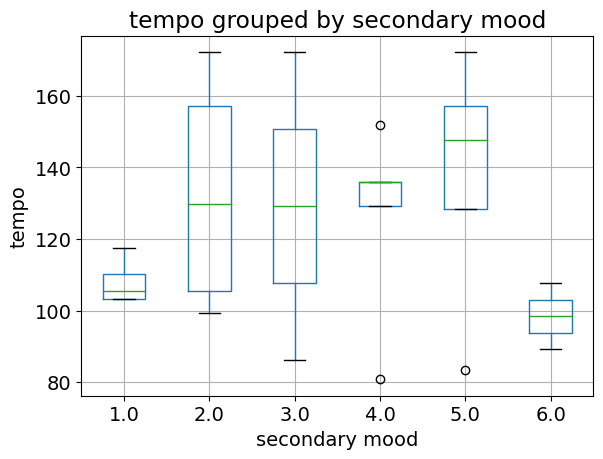

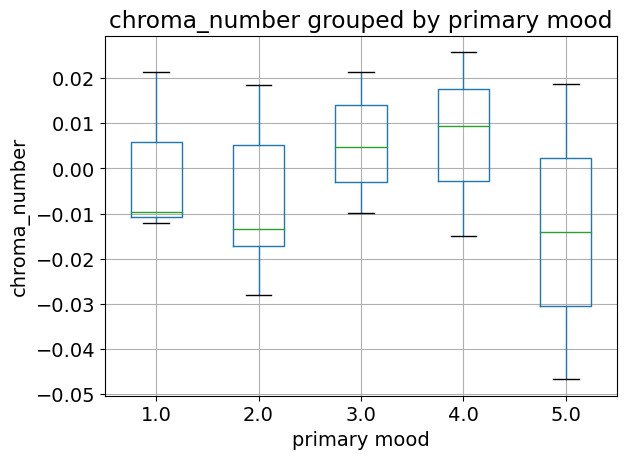

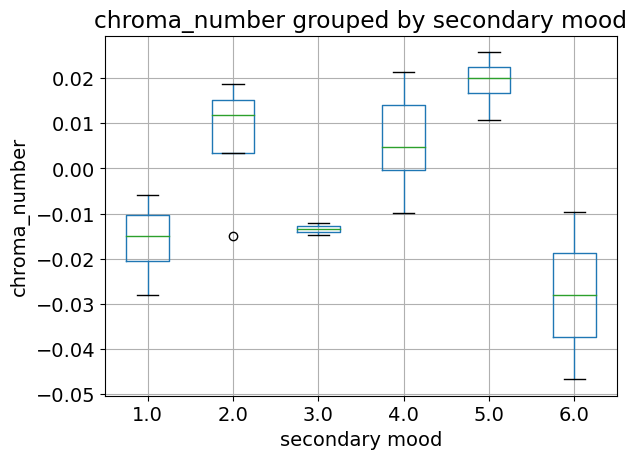

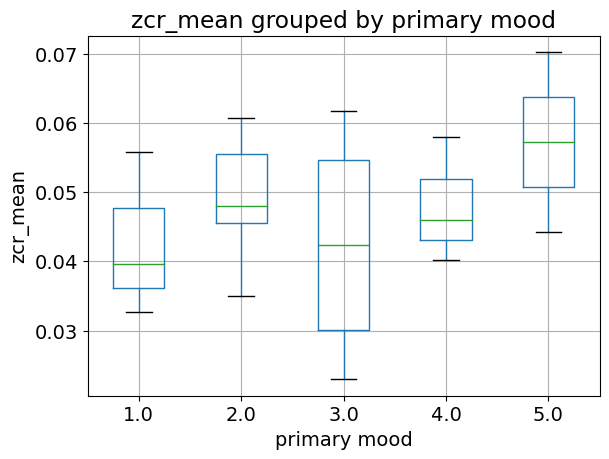

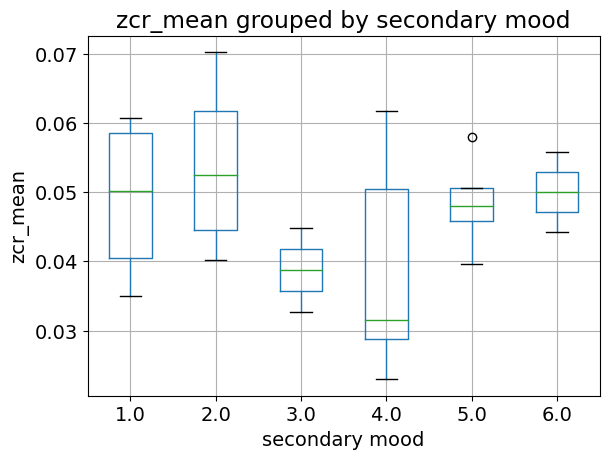

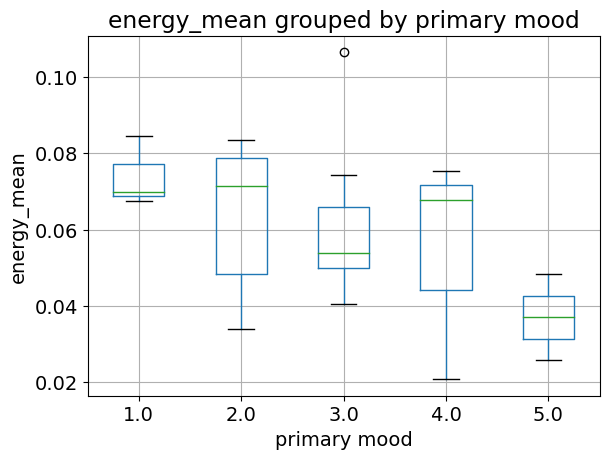

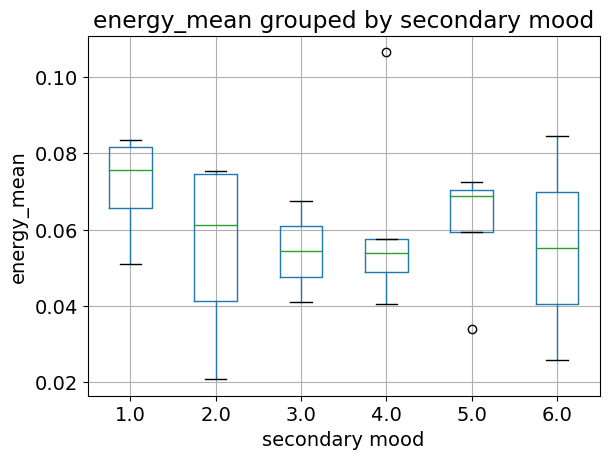

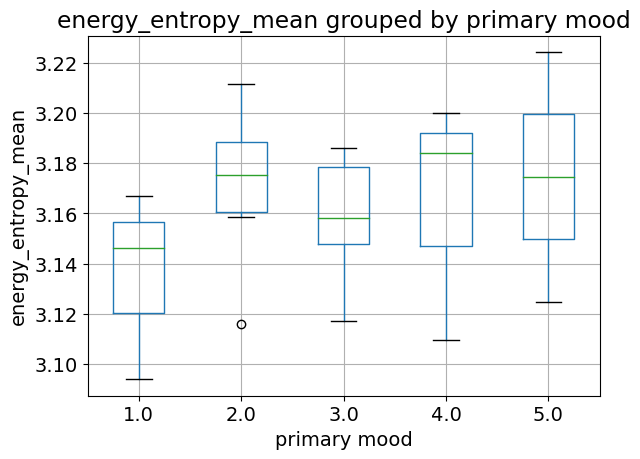

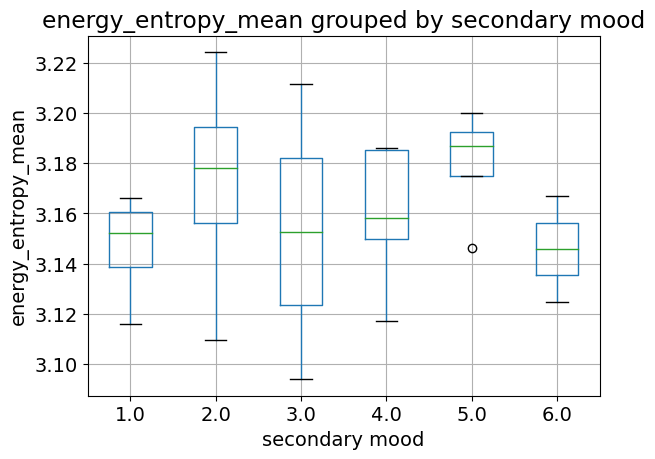

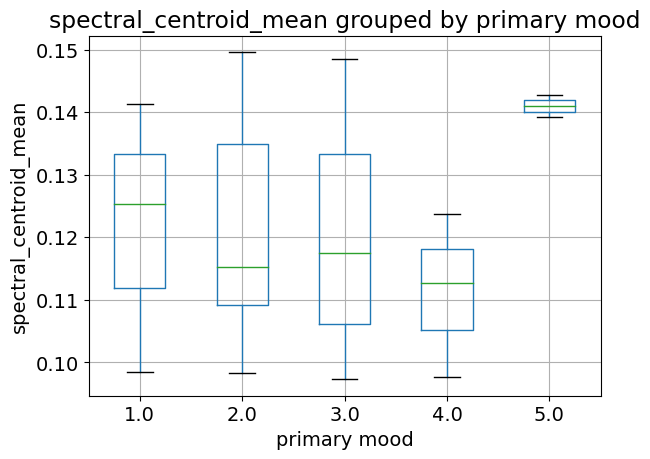

In [31]:
# drop repeating columns and song information
combined = combined.drop(columns = ['title', 'artist', 'zero_crossing_rate', 'energy_entropy', 'spectral_centroid'])

# generate boxplots of distribution of each feature for feature engineering
for col in combined.columns:
    if col == "primary" or col == "secondary":
        continue
    
    # boxplot for primary mood
    combined.boxplot(column = col, by = 'primary')
    filename = "primary_dist_" + col + ".pdf"
    plt.ylabel(col)
    plt.xlabel('primary mood')
    plt.suptitle('')
    plt.title(col + ' grouped by primary mood')
    plt.savefig(filename, bbox_inches = 'tight')
    plt.show()
    
    # boxplot for secondary mood
    combined.boxplot(column = col, by = 'secondary')
    filename = "secondary_dist_" + col + ".pdf"
    plt.ylabel(col)
    plt.xlabel('secondary mood')
    plt.suptitle('')
    plt.title(col + ' grouped by secondary mood')
    plt.savefig(filename, bbox_inches = 'tight')
    plt.show()